In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from math import sqrt

In [8]:
ticker = "AMZN"
start = "2023-03-05"
end = "2023-04-13"
interval = '30m'

In [9]:
df = yf.download(ticker, start=start, end=end, interval=interval)
df.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-03-06 09:30:00,95.190002,95.723099,94.680000,95.000000,95.000000,6844088
2023-03-06 10:00:00,95.000000,96.070000,94.680000,95.730003,95.730003,4290800
2023-03-06 10:30:00,95.739998,96.279999,95.680000,96.110001,96.110001,3422587
2023-03-06 11:00:00,96.119904,96.480003,95.970001,96.080002,96.080002,3057231
2023-03-06 11:30:00,96.079903,96.544998,96.004997,96.430099,96.430099,2548234


In [10]:
data = df['Close']
# print(data)
print(data.values.shape)
scaler = MinMaxScaler()
data = scaler.fit_transform(data.values.reshape(-1, 1))
# print(data)

(351,)


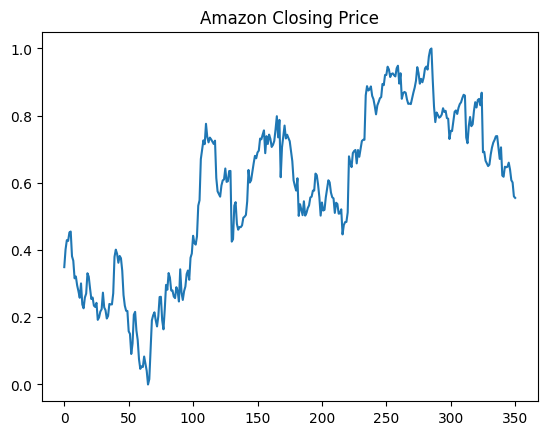

In [11]:
plt.plot(data)
plt.title('Amazon Closing Price')
plt.show()

In [12]:
# practice
# training_data_len = int(len(data) * 0.83)
# training_data = data[0:training_data_len, :]
# testing_data = data[training_data_len:, :]

In [13]:
# X_train = []
# for i in range(13, len(training_data)):
#     x = training_data[i-13:i,0]
#     X_train.append(x)
#     z=np.array(X_train)
# #     print('length', len(x))
# z.reshape(288,13,1)

In [14]:
training_data_len = int(len(data) * 0.83)
# print(training_data_len)
training_data = data[0:training_data_len, :]
testing_data = data[training_data_len:, :]

len(training_data), len(testing_data)

(291, 60)

In [86]:
past_values = 13
look_forward = 13

def create_training_data(data, past_values,look_forward):
    if len(data) < past_values:
        return np.array([]), np.array([])
    X_train = []
    y_train = []
    for i in range(past_values, len(data)-past_values):
        X_train.append(data[i-past_values:i, 0])
        y_train.append(data[i:i+look_forward, 0])
        i+=13
#         print(y_train)
    return np.array(X_train), np.array(y_train)

X_train, y_train = create_training_data(training_data, past_values,look_forward)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test, y_test = create_training_data(testing_data, past_values,look_forward)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [87]:
# y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))
# y_test = np.reshape(y_test, (y_test.shape[0], y_test.shape[1], 1))

In [88]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((265, 13, 1), (34, 13, 1), (265, 13), (34, 13))

In [89]:

X_train.shape, X_test.shape


((265, 13, 1), (34, 13, 1))

In [90]:
# X_train

In [91]:
y_train.shape,y_test.shape

((265, 13), (34, 13))

In [92]:
y_train

array([[0.3007956 , 0.23825002, 0.22668125, ..., 0.23464936, 0.23083136,
        0.24295012],
       [0.23825002, 0.22668125, 0.25885765, ..., 0.23083136, 0.24295012,
        0.19233574],
       [0.22668125, 0.25885765, 0.27042697, ..., 0.24295012, 0.19233574,
        0.19956629],
       ...,
       [0.92660888, 0.89515569, 0.90961679, ..., 1.        , 0.90708579,
        0.82718017],
       [0.89515569, 0.90961679, 0.89949391, ..., 0.90708579, 0.82718017,
        0.78091118],
       [0.90961679, 0.89949391, 0.91394783, ..., 0.82718017, 0.78091118,
        0.80947203]])

In [93]:
# X_train.shape[1:],y_train.shape[1:]

In [94]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1:])))
# model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1:], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(13))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=200, epochs=200, verbose=1)

Epoch 1/200
2/2 [==============================] - 6s 36ms/step - loss: 0.3458
Epoch 2/200
2/2 [==============================] - 0s 34ms/step - loss: 0.3066
Epoch 3/200
2/2 [==============================] - 0s 25ms/step - loss: 0.2593
Epoch 4/200
2/2 [==============================] - 0s 42ms/step - loss: 0.2019
Epoch 5/200
2/2 [==============================] - 0s 38ms/step - loss: 0.1393
Epoch 6/200
2/2 [==============================] - 0s 33ms/step - loss: 0.0935
Epoch 7/200
2/2 [==============================] - 0s 36ms/step - loss: 0.0868
Epoch 8/200
2/2 [==============================] - 0s 38ms/step - loss: 0.0717
Epoch 9/200
2/2 [==============================] - 0s 42ms/step - loss: 0.0459
Epoch 10/200
2/2 [==============================] - 0s 34ms/step - loss: 0.0375
Epoch 11/200
2/2 [==============================] - 0s 42ms/step - loss: 0.0392
Epoch 12/200
2/2 [==============================] - 0s 33ms/step - loss: 0.0368
Epoch 13/200
2/2 [==============================]

In [95]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [96]:
pred_train = scaler.inverse_transform(pred_train)
pred_test = scaler.inverse_transform(pred_test)
y_test = scaler.inverse_transform(y_test)
y_train = scaler.inverse_transform(y_train)

In [97]:
y_test = y_test.flatten()
y_train = y_train.flatten()

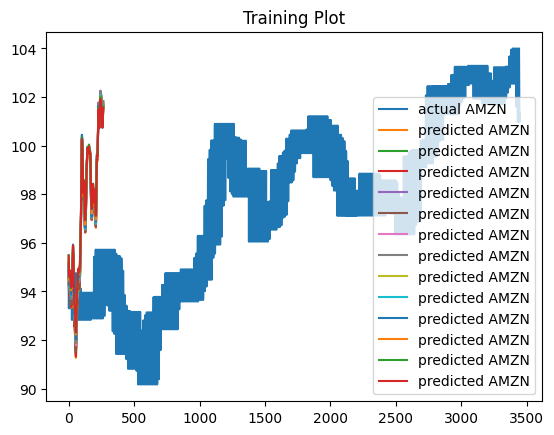

In [99]:
# print("Training Error")
# mae = mean_absolute_error(y_train, pred_train)
# print("Mean Absolute Error (MAE):", mae)
# rmse = sqrt(mean_squared_error(y_train, pred_train))
# print("Root Mean Squared Error (RMSE):", rmse)
    
plt.plot(y_train, label = 'actual '+str(ticker))
plt.plot(pred_train, label = 'predicted '+str(ticker))
plt.title("Training Plot")
plt.legend()
plt.show()

Testing Error
Mean Absolute Error (MAE): 0.32381944532518264
Root Mean Squared Error (RMSE): 0.4947754534496045


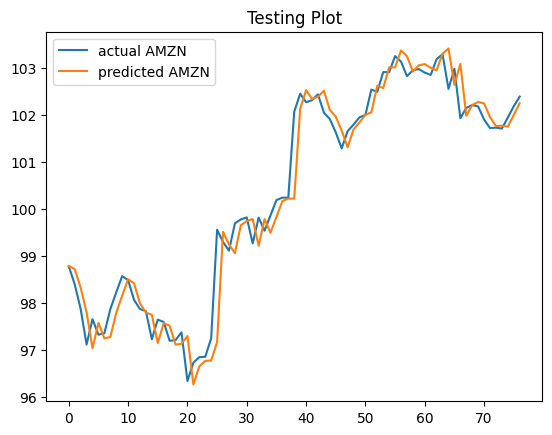

In [44]:
print("Testing Error")
mae = mean_absolute_error(y_test, pred)
print("Mean Absolute Error (MAE):", mae)
rmse = sqrt(mean_squared_error(y_test, pred))
print("Root Mean Squared Error (RMSE):", rmse)

plt.plot(y_test, label = 'actual '+str(ticker))
plt.plot(pred, label = 'predicted '+str(ticker))
plt.title("Testing Plot")
plt.legend()
plt.show()

## 10 days future prediction without correction

In [15]:
def predict_future(days, last_input):
    Output = []
    i = 0
    while(i<days):
#         print('before reshape',last_input)
        last_input = last_input.reshape((1, past_values, 1))
#         print('After Reshape',last_input)
        res = model.predict(last_input)
        last_input = res
        Output.extend(res.tolist())
        i=i+1
        
    print(Output)
    Output = scaler.inverse_transform(Output)
    print(Output)
    return Output
    
future_predictions = predict_future(1, X_test[-1])
future_predictions = future_predictions.flatten()

1/1 [==============================] - 0s 15ms/step
[[0.2341868132352829], [0.2563401758670807], [0.2734543979167938], [0.28686702251434326], [0.2974961996078491], [0.30599331855773926], [0.3128332495689392], [0.31836965680122375], [0.3228710889816284], [0.3265441954135895]]
[[106.35118452]
 [108.67176024]
 [110.46448349]
 [111.86946256]
 [112.98287414]
 [113.87295156]
 [114.58943772]
 [115.16937913]
 [115.64090638]
 [116.0256661 ]]


In [16]:
day = range(1,11)

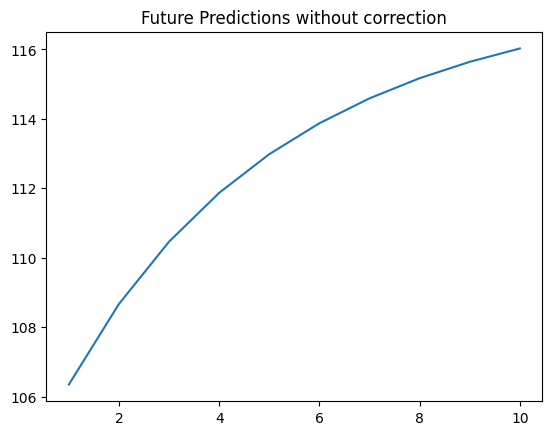

In [17]:
plt.title('Future Predictions without correction')
plt.plot(day,future_predictions)
plt.show()

# 10 days future predictions with one day correction

In [18]:
df = yf.download('AMZN', start='2023-04-03', end='2023-04-18')
df = df.reset_index(drop=True)
data = df['Close'].values
print(data)
data = scaler.fit_transform(data.reshape(-1, 1))
output_list = []
for d in data:
#     print('Actual Price',d)
    inp = d.reshape((1,1,1))
    pred = model.predict(inp)
#     print('Predicted Price',pred)
    pred1 = scaler.inverse_transform(pred)
    output_list.extend(pred1.tolist())
#     print('Predicted Price after inverse scaler',pred1)

print(output_list)

[*********************100%***********************]  1 of 1 completed
[102.41000366 103.94999695 101.09999847 102.05999756 102.16999817
  99.91999817  97.83000183 102.40000153 102.51000214 102.73999786]
1/1 [==============================] - 0s 27ms/step
[[102.2991714477539], [104.10028839111328], [100.96866607666016], [101.92576599121094], [102.04170227050781], [99.9222640991211], [98.3915786743164], [102.28832244873047], [102.40827941894531], [102.66336059570312]]


In [19]:
day = range(1,11)

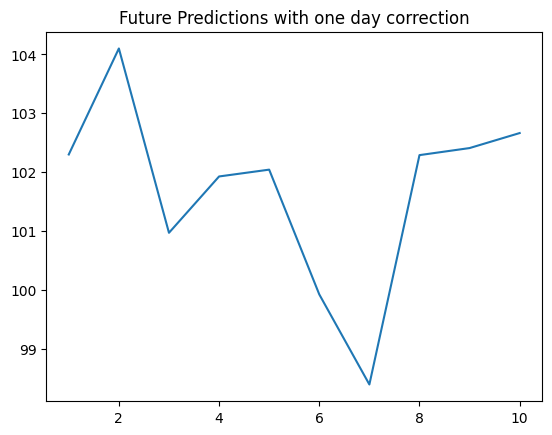

In [20]:
plt.title('Future Predictions with one day correction')
plt.plot(day,output_list)
plt.show()

# 10 days future predictions with two days correction

In [42]:
# alist = [20,30,40,50]
# for i in range(len(alist)):
#     print(alist[i],alist[i+1])
    
df = yf.download('AMZN', start='2023-04-03', end='2023-04-19')
# df = df.reset_index(drop=True)
data1 = df['Close'].values
data = scaler.fit_transform(data1.reshape(-1, 1))
print(data)
# print(data[0][0])
# print(data[1][0])
output_list_2 = []
for d in range(len(data+2)):
    try:
        inp = np.array([data[d][0],data[d+1][0]])
#         inp2 = np.array(data[d+1])
#         print(inp)
        inp1 = inp.reshape((1,2,1))
#         inp2 = inp2.reshape((1,1,1))
#         print(inp1)
#         pred = model.predict([inp1,inp2])
        pred = model.predict(inp1)
#         print(pred)
        pred = scaler.inverse_transform(pred)
        output_list_2.extend(pred.tolist())
#         print(output_list_2)
    except:
        print('error')

print(output_list_2)


[*********************100%***********************]  1 of 1 completed
[[0.74836691]
 [1.        ]
 [0.5343136 ]
 [0.69117632]
 [0.70915029]
 [0.34150294]
 [0.        ]
 [0.74673257]
 [0.76470654]
 [0.80228757]
 [0.73039294]]
1/1 [==============================] - 0s 25ms/step
error
[[113.26686096191406], [113.2602767944336], [107.25408172607422], [109.73389434814453], [107.16815185546875], [100.6181640625], [101.05786895751953], [111.08458709716797], [111.70662689208984], [111.6801986694336]]


In [45]:
day = range(1,11)

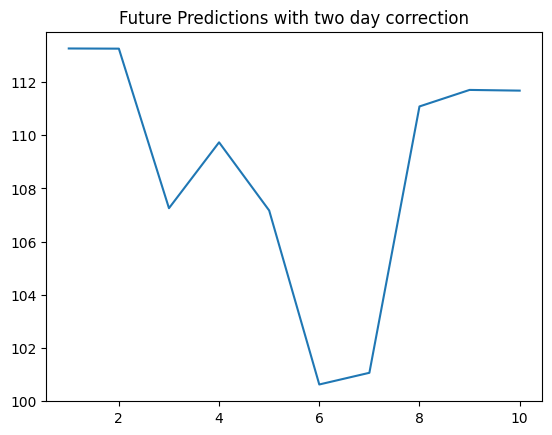

In [46]:
plt.title('Future Predictions with two day correction')
plt.plot(day,output_list_2)
plt.show()

In [48]:
day_new=np.arange(1,101)
day_pred=np.arange(101,111)

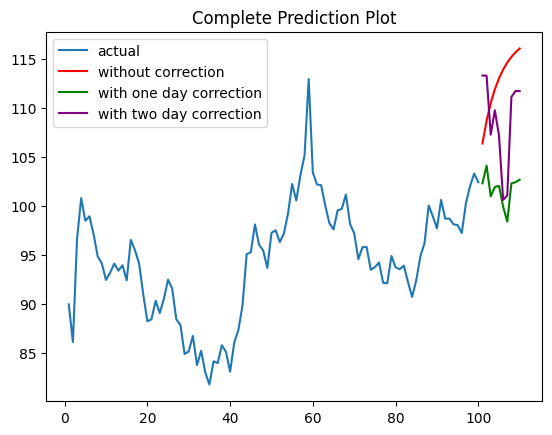

In [52]:
plt.title('Complete Prediction Plot')
plt.plot(day_new,y_test, label = 'actual')
plt.plot(day_pred,future_predictions, label = 'without correction', color='red')
plt.plot(day_pred,output_list, label = 'with one day correction', color='green')
plt.plot(day_pred,output_list_2, label = 'with two day correction', color='purple')
plt.legend()
plt.show()